# Visualize category trees

Module *wikidat.utils.userresolver* retrieves a list of user names for each country in a list of seed countries. Each of these countries is represented by a wikipedia Category. Users which are part of these category or one of its subcategories are associated with that country. Additionally, this module keeps record of the subcategories which belong to each category.

Note: package pydot graphviz and are required by this notebook 

In [1]:
import unicodedata
import pydot
from IPython.display import Image

import btb.utils.userresolver as usr

Couldn't import dot_parser, loading of dot files will not be possible.


Categories and sub categories can be visualized through a tree graph. The root of this graph tree is the country code, with the first level being all the seed categories associated with that country. The next level contains all of the sub categories of the previous level and so on.

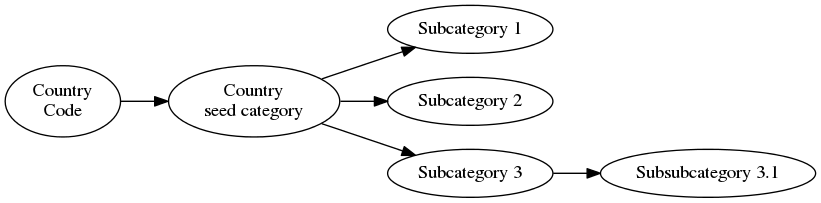

In [2]:
graph = pydot.Dot('graphname', graph_type='digraph', rankdir='LR')

graph.add_edge(pydot.Edge('Country\nCode', 'Country\nseed category'))
graph.add_edge(pydot.Edge('Country\nseed category', 'Subcategory 1'))
graph.add_edge(pydot.Edge('Country\nseed category', 'Subcategory 2'))
graph.add_edge(pydot.Edge('Country\nseed category', 'Subcategory 3'))
graph.add_edge(pydot.Edge('Subcategory 3', 'Subsubcategory 3.1'))

graphName = 'demoGraph.png'
graph.write_png(graphName)
Image(filename=graphName)

In [3]:
def edgeStr(name):
    '''
    Format the name of a category for display.
    '''
    name = name.replace('Category:','')
    name = name.replace('Wikipedians in ','')
    name = name.replace('Wikipedians from ','')
    
    name = name.replace(' Wikipedians','')
    # Make plain ascii
    name = unicodedata.normalize('NFKD', unicode(name)).encode('ascii','ignore')
    return name

In [4]:
def addEdge(graph, fromN, toN):
    '''
    Add an edge from a category to its subcategory
    '''
    if isinstance(toN, int):
        # If node contains number of users, display number of users in node name
        # E.g. Amsterdam_(500)
        fromStr = edgeStr(fromN)
        nodeLabel = fromStr + '\nUsers: ' + str(toN) + ''
        graph.add_node(pydot.Node(fromStr, label=nodeLabel))
    else:
        # Add an edge from X to Y
        fromStr = edgeStr(fromN)
        toStr   = edgeStr(toN)
        graph.add_edge(pydot.Edge(fromStr, toStr))

The category and subcategory information is recorded as a list of parent/child tuples. In this list, the parent is the category and each child is one of its subcategories. Additionally, a parent category will have an integer type child; this indicates the number of users in that category.

    [(DAD, CHILD1),
     (DAD, CHILD2),
     (DAD, CHILD3) ]

In [5]:
usernames, log = usr.__getUserMap__('en')
usr.__log__ = log

Unable to find usernames_en.pkl -- new one will be created
Fetching  Category:French Wikipedians ...
Fetching  Category:Breton Wikipedians ...
Fetching  Category:Corsican Wikipedians ...
Fetching  Category:Norman Wikipedians ...
Fetching  Category:Wikipedians in France ...
Fetching  Category:Wikipedians in Brittany ...
Fetching  Category:Wikipedians in Bordeaux ...
Fetching  Category:Wikipedians in Paris ...
Fetching  Category:Wikipedians in Basque Country ...
Fetching  Category:Wikipedians in San Sebastian ...
Fetching  Category:Wikipedians in Grenoble ...
Fetching  Category:Wikipedians in Marseille ...
Fetching  Category:Wikipedians in Occitania ...
Fetching  Category:German Wikipedians ...
Fetching  Category:Wikipedians from Germany ...
Fetching  Category:Wikipedians in Germany ...
Fetching  Category:Wikipedians in East Germany ...
Fetching  Category:Wikipedians in Berlin ...
Fetching  Category:Wikipedians in East-Berlin ...
Fetching  Category:Wikipedians in Berlin-Moabit ...
Fetchi

In [6]:
def getChildren(dad):
    '''
    Retrieve all the children from a given parent
    '''
    allKids = [ kid for kid in usr.__log__ if kid[0]==dad ]
    searchTerms = []
    for kid in allKids:
        kidName = kid[1]
        searchTerms.append(kidName)
        if not isinstance(kidName, int):
            if not kidName.startswith('Category:'):
                searchTerms.append('Category:' + kidName)
    return allKids,searchTerms

dad = 'Category:Wikipedians in Greece'
kids,_ = getChildren(dad)
print 'Children of: ',edgeStr(dad)
for kid in kids:
    if isinstance(kid[1], int):
        print '  > Number of users:',kid[1],
    else:
        print '  >',edgeStr(kid[1])

Children of:  Greece
  > Macedonia (Greece)
  > Athens
  > Number of users: 230


In [7]:
def getGraphForSeed(seed):
    '''
    Produce a subgraph of all decendents (children and their children and their children...)
    for a given seed country code.
    '''
    searchFor = [ seed ]
    allItems = []
    while len(searchFor)>0:
        seed = searchFor.pop()
        children,searchTerms = getChildren(seed)
        allItems = allItems + children
        searchFor = searchFor + searchTerms
    return allItems

In [8]:
def drawGraphForSeed(seed):
    '''
    Create a graphical representation of all decendents of the given seed country code.
    '''
    allItems = getGraphForSeed(seed)
    graph = pydot.Dot('graphname', graph_type='digraph', rankdir='LR')

    for i in range(len(allItems)):
        addEdge(graph, allItems[i][0], allItems[i][1])

    graphName = 'graph' + seed + '.png'
    graph.write_png(graphName)
    graph.write_pdf('graph' + seed + '.pdf')
    
    return Image(filename=graphName)

A given country code contains a seed category for the whole country, and any number of subcategories for provinces, regions, cities, etc. Each category has a number of users associated with it (displayed in brackets).

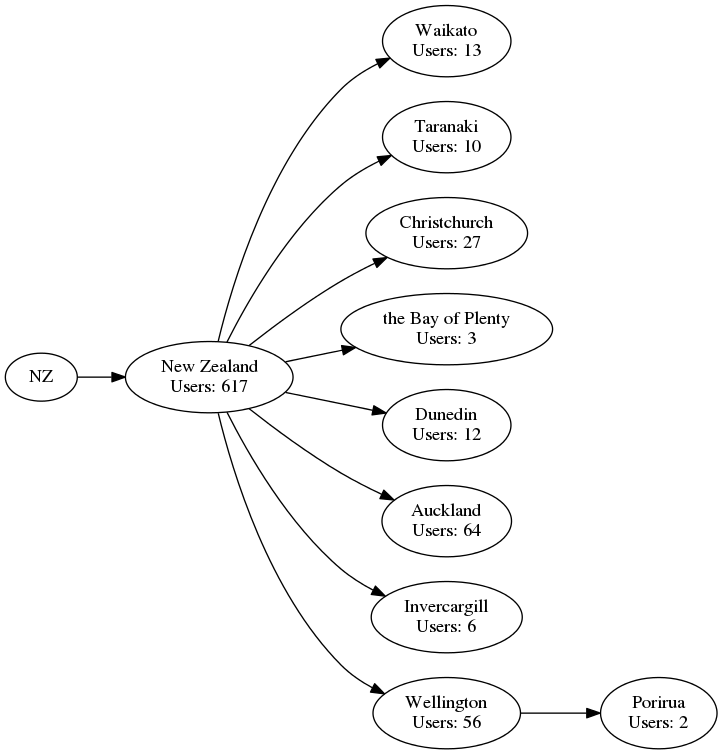

In [9]:
drawGraphForSeed('NZ')

Some countries (like the Netherlands) have more than one seed category ('Netherlands' and 'the Netherlands').

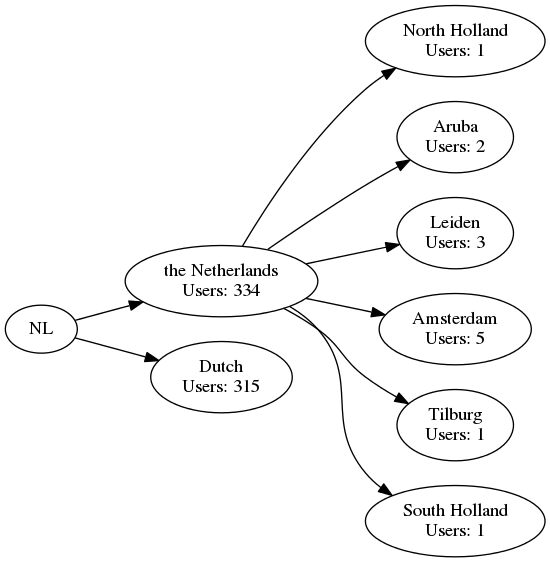

In [10]:
drawGraphForSeed('NL')

The graph structure for Canada is a bit more complicated. Other countries such as USA and India have even larger graphs.

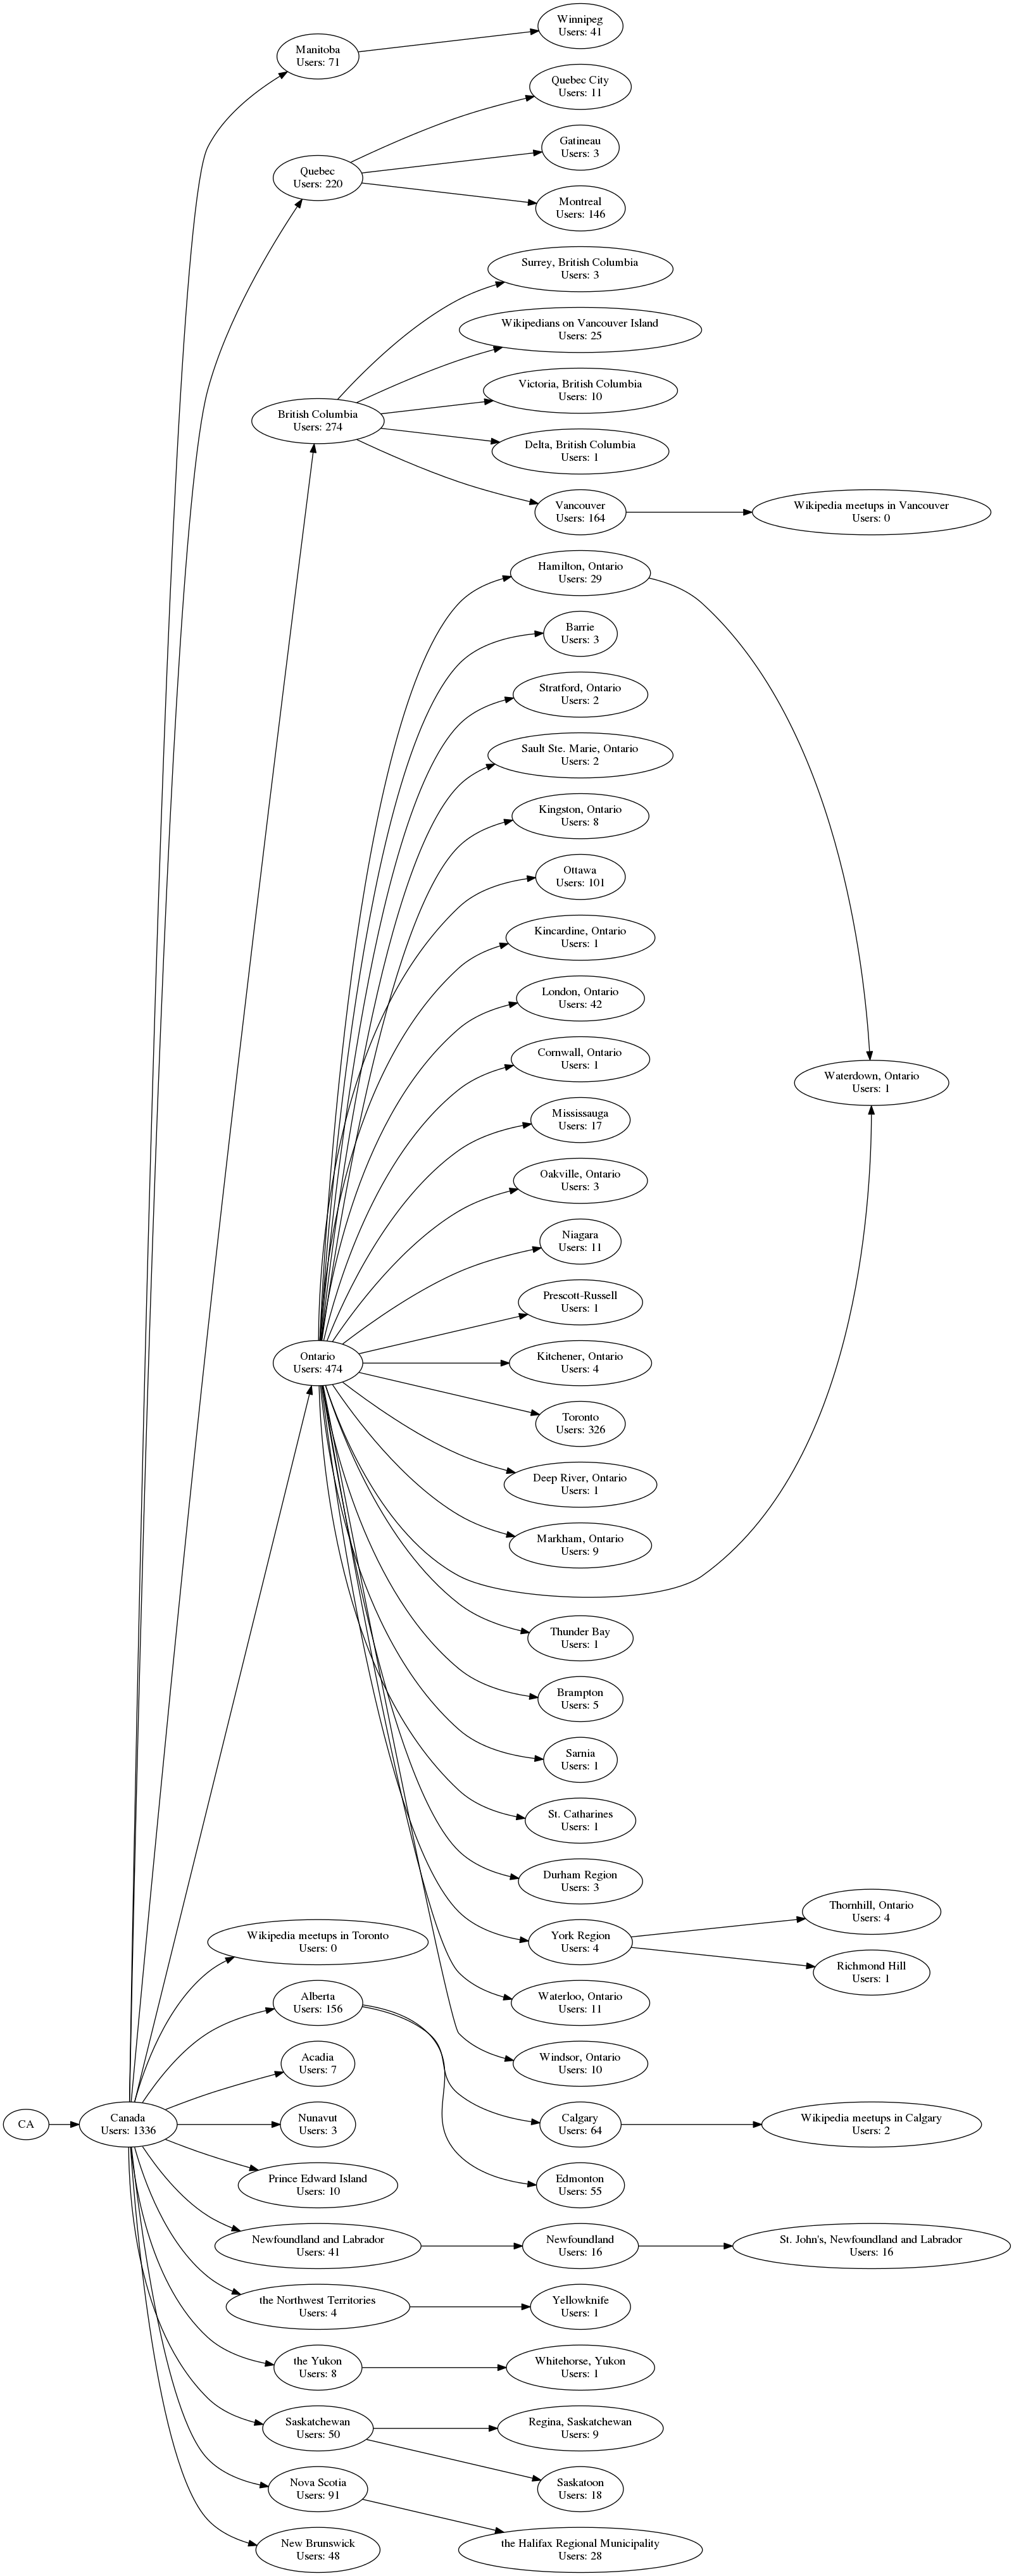

In [25]:
drawGraphForSeed('CA')

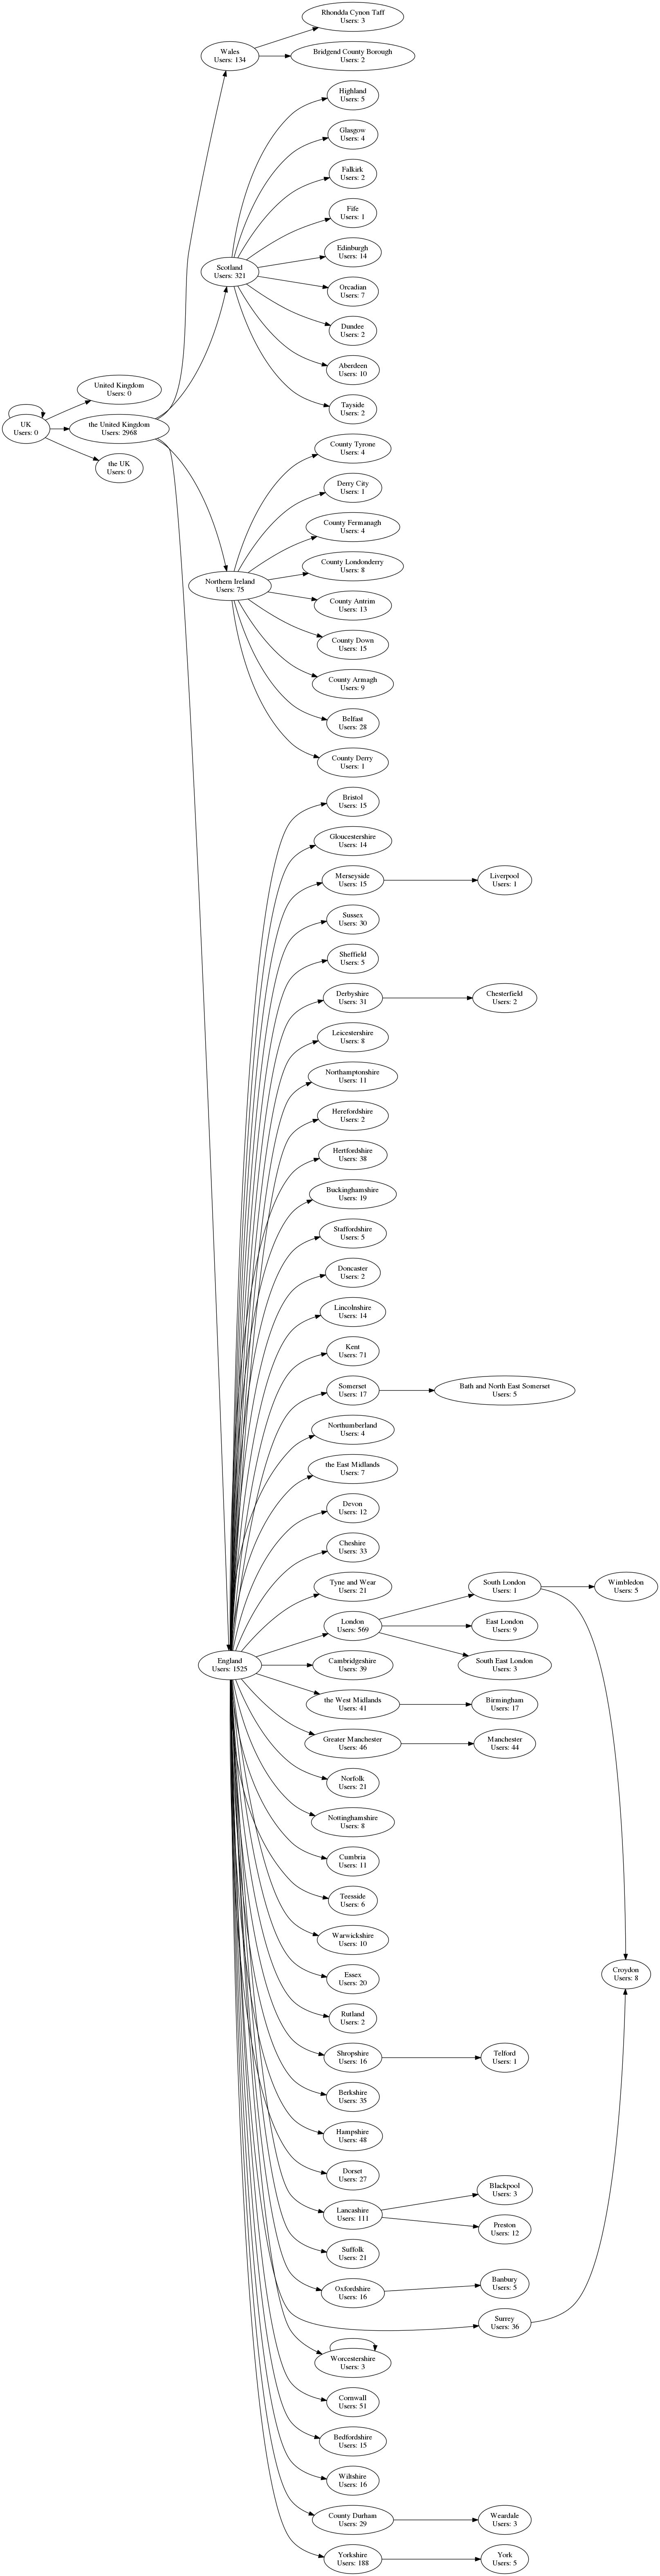

In [26]:
drawGraphForSeed('UK')